# Nbank Predicting Term Deposit Subscription

In [1]:
#install libraries

In [2]:
pip install pandas scikit-learn streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")  

# !pip install missingno
#import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import joblib


# Set plot style
sns.set(style="whitegrid")

In [4]:
!pip install xgboost

In [5]:
#load data

In [6]:
df= pd.read_csv('C:/Users/Dell/Downloads/nbank_telesale/Nbank_Tele.csv')

There are 11162 observations in this dataset. Each represents an existing customer that the bank reached via phone calls.

For each observation, the dataset records 17 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts.
There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the phone calls.

In [7]:
#Describing the data

In [8]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-" + "\n")
    print(dataframe.info())
    
    print(20*"-" + "Data Shape".center(20) + 20*"-" + "\n")
    print(dataframe.shape)
    
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-" + "\n")
    print(dataframe.head())
    
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-" + "\n")
    print(dataframe.tail())
    
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-" + "\n")
    print(dataframe.isnull().sum())
    
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-" + "\n")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
--------------------     Data Sh

There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

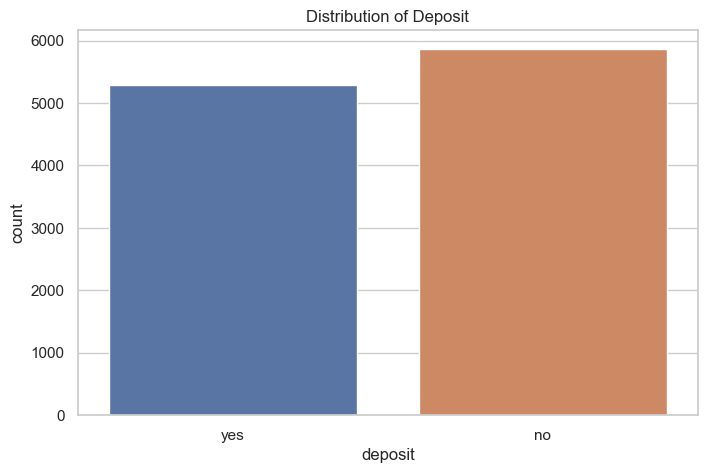

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the distribution of the target variable 'deposit'
plt.figure(figsize=(8, 5))
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Deposit')
plt.show()

# Features with one value

In [10]:
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


# Explore the Categorical Features

In [11]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

there are 9 categorical features feature job and month has highest number of categorical values

Find Categorical feature Distribution

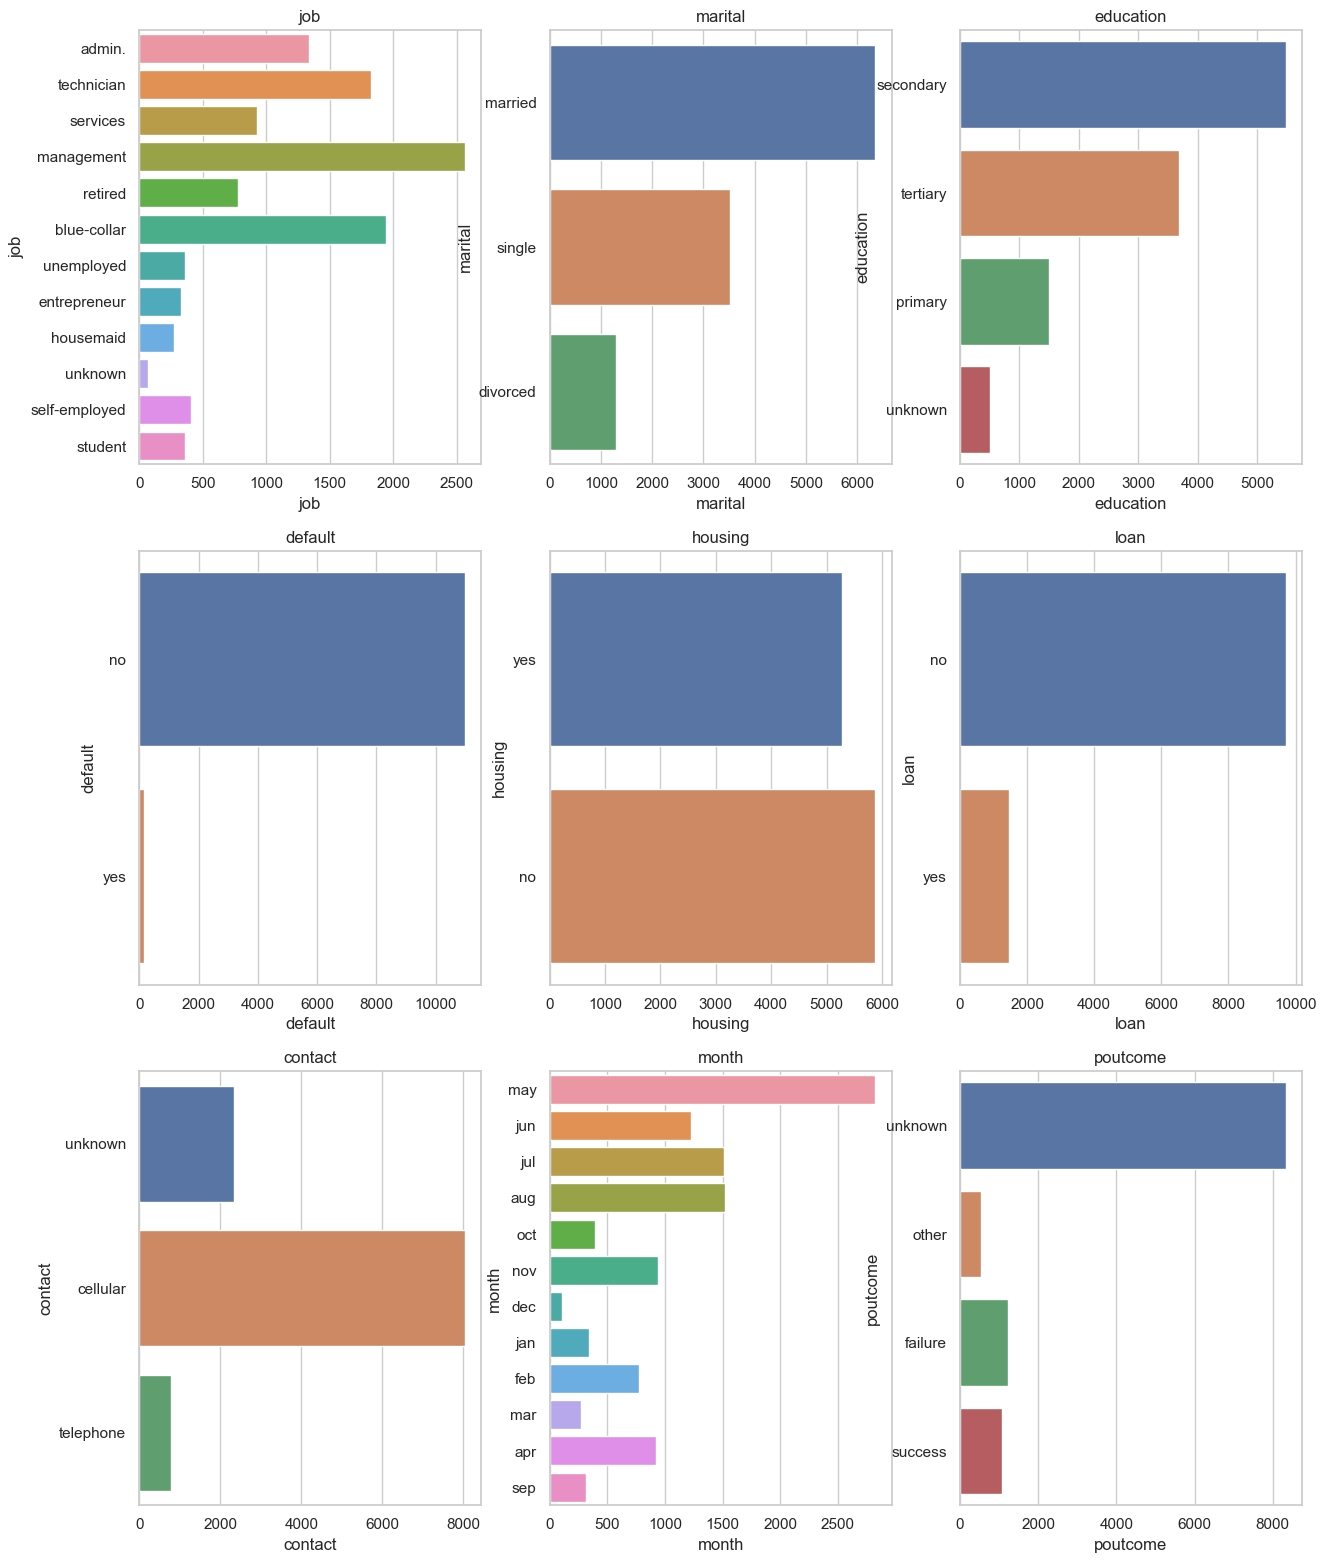

In [12]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

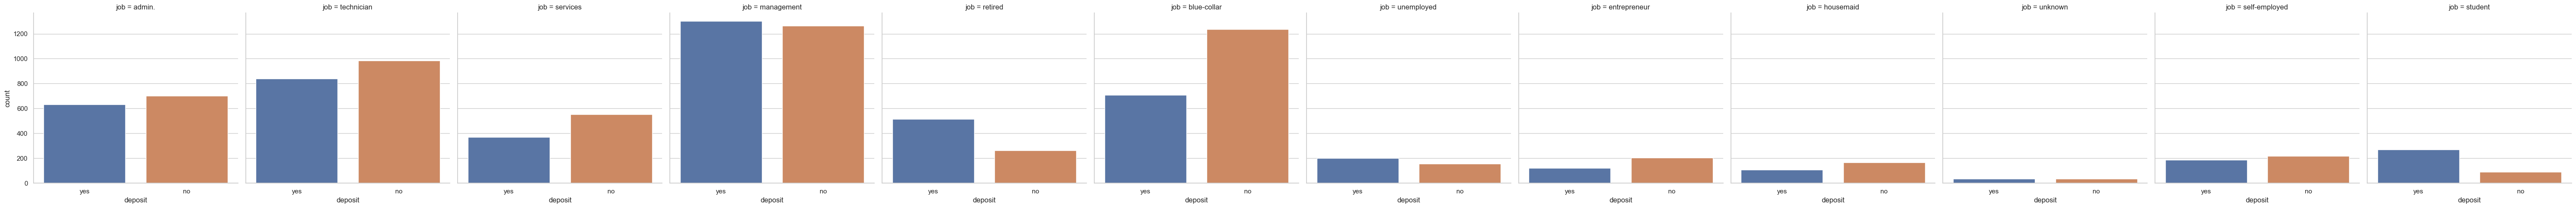

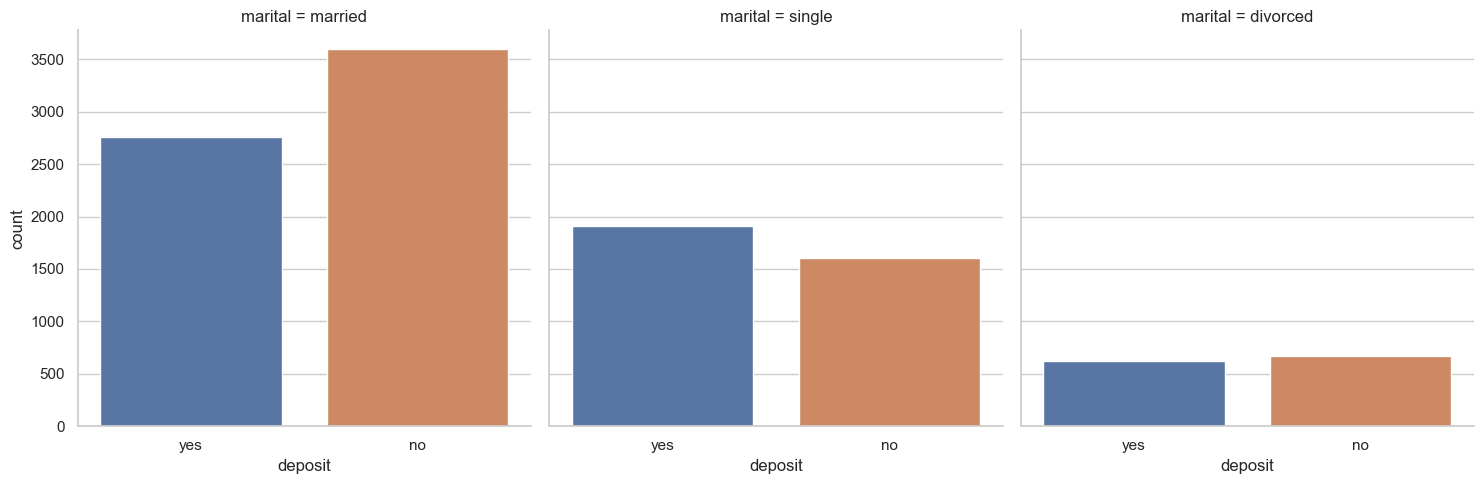

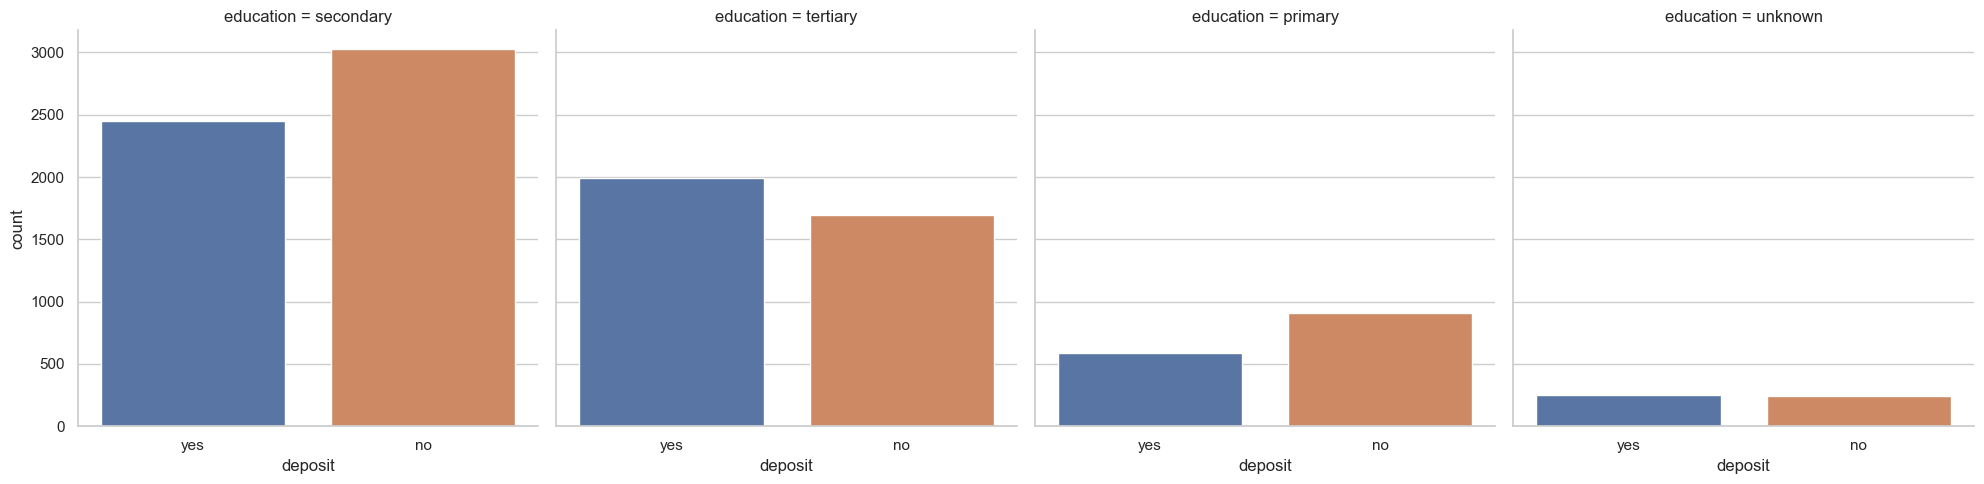

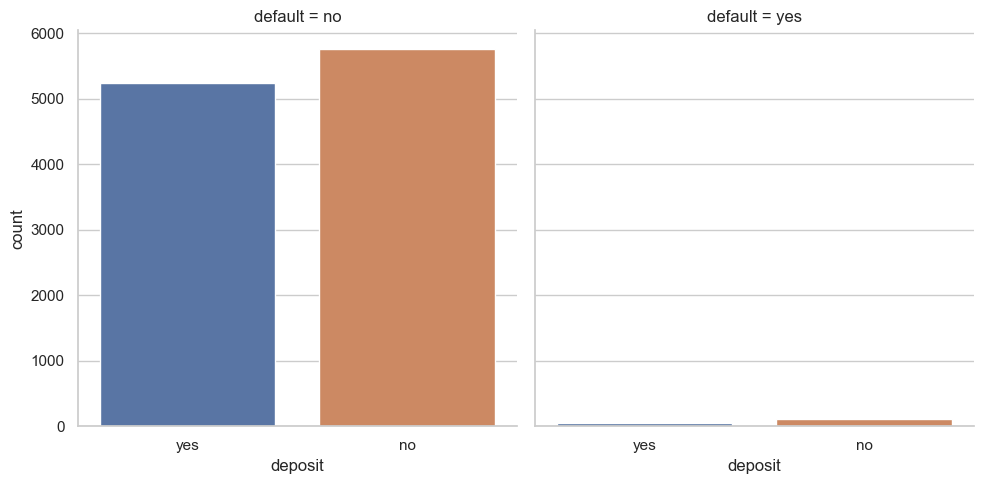

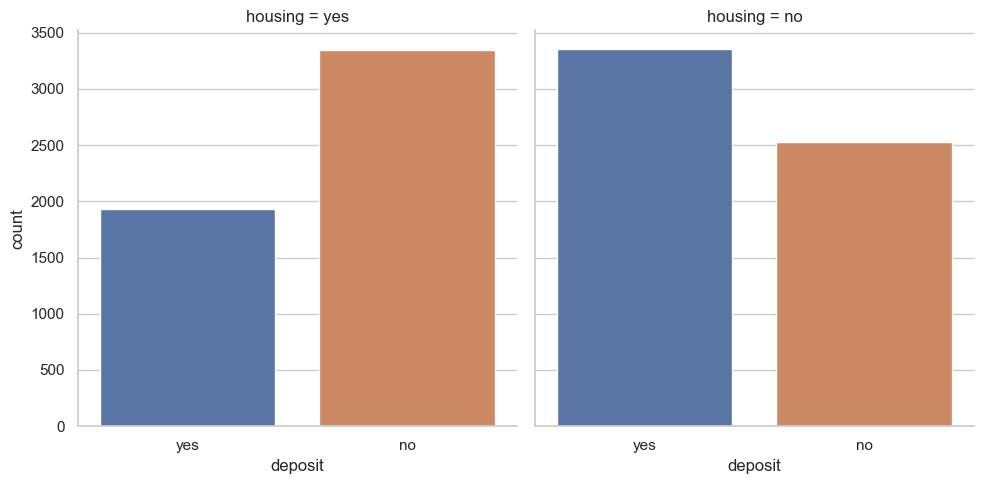

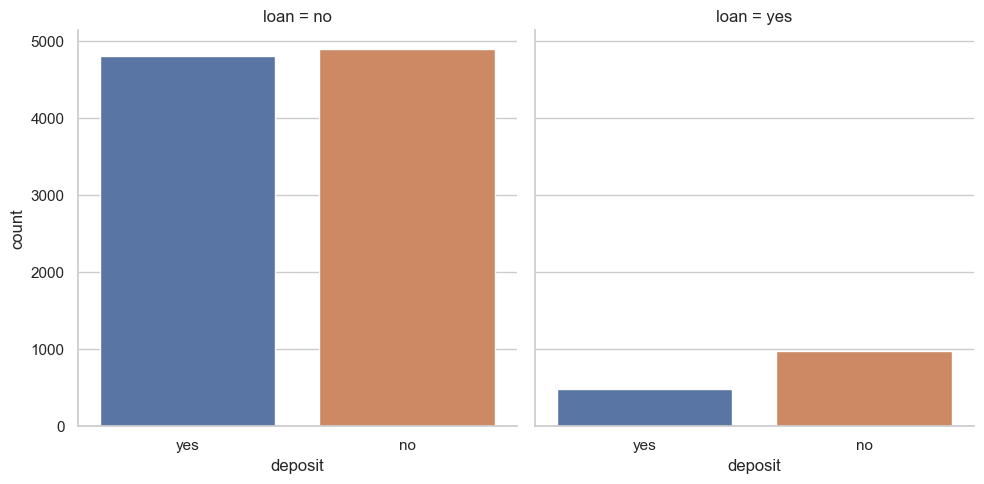

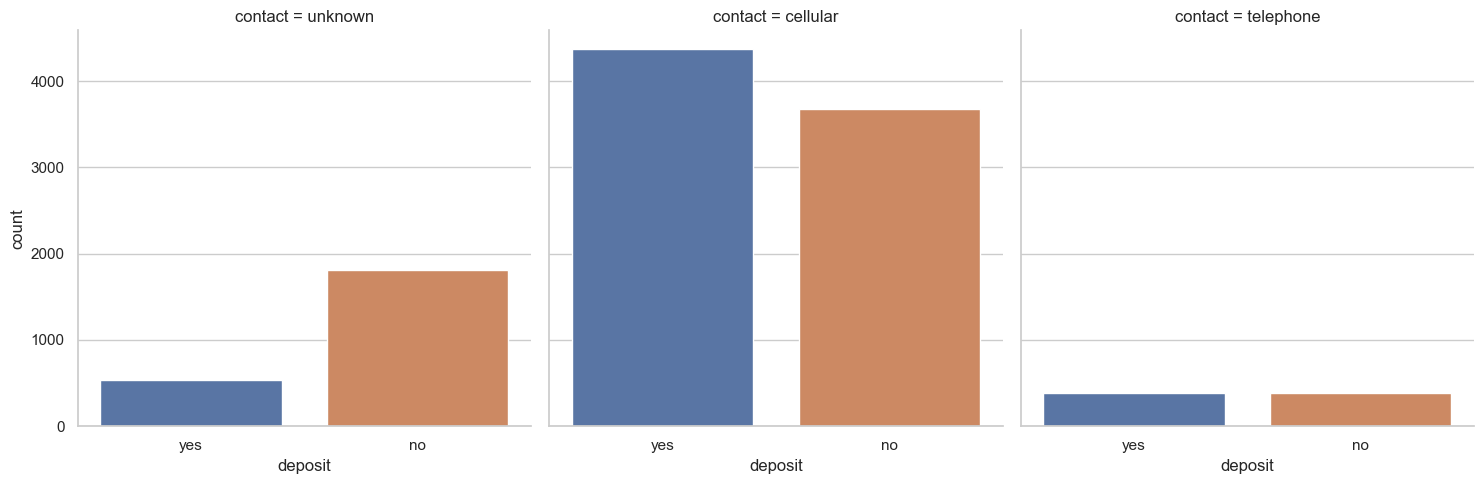

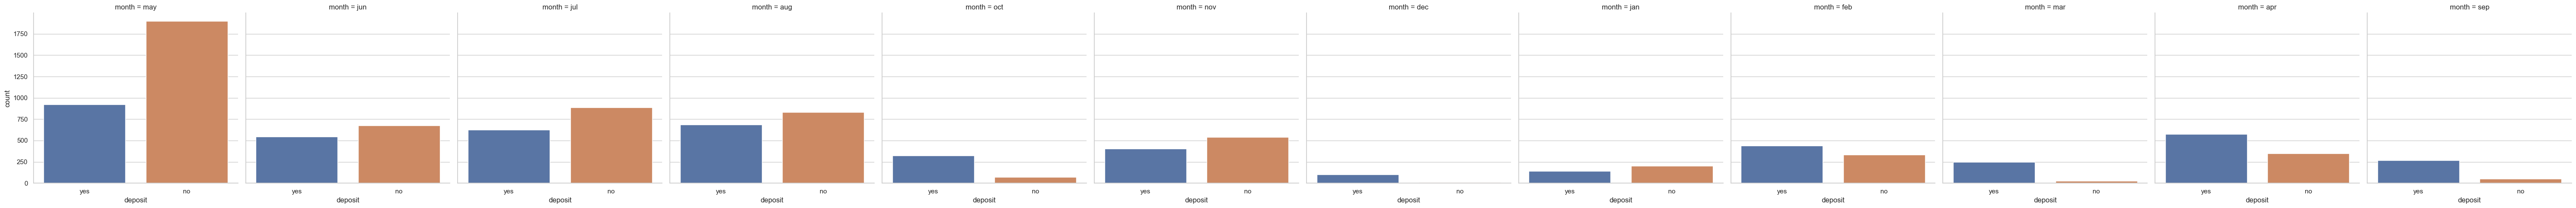

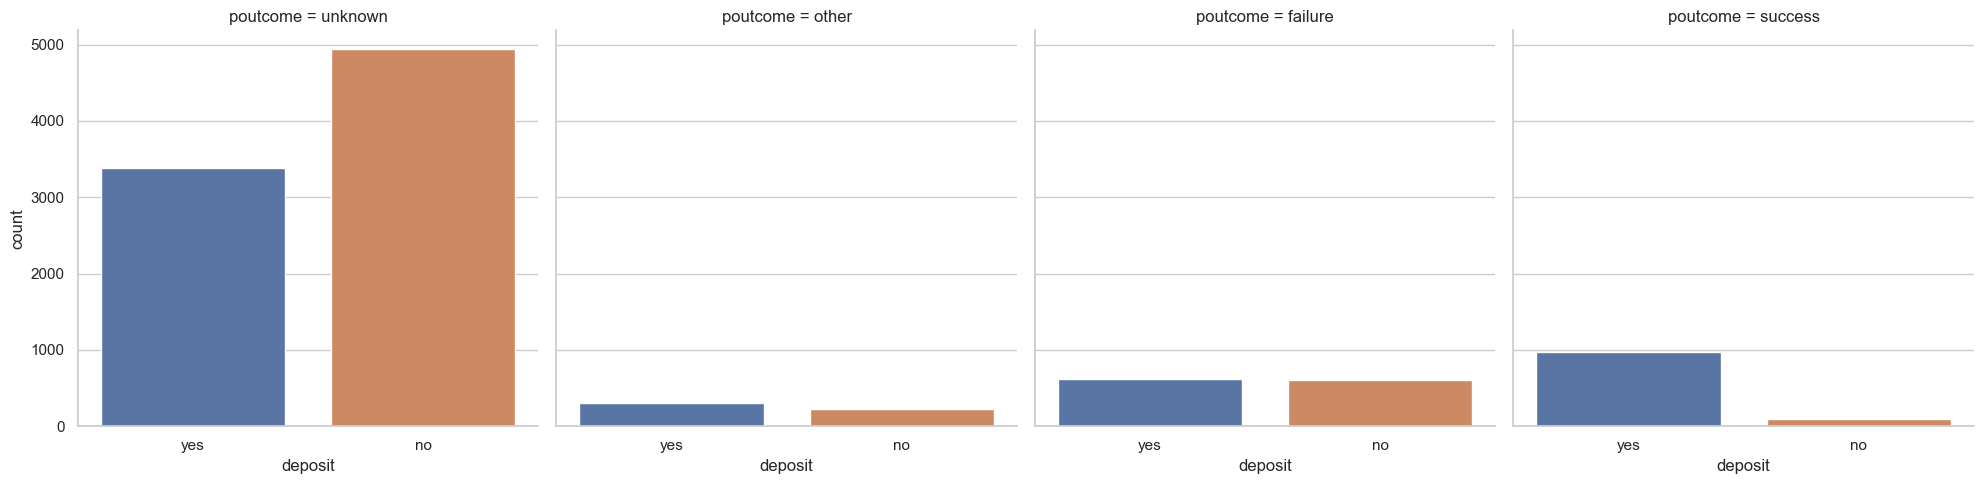

In [13]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)

retired client has high interest on deposit client who has housing loan seems to be not interested much on deposit if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit in month of March, September, October and December, client show high interest to deposit in month of may, records are high but client interst ratio is very less

# Explore the numericl features

In [14]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


# Find Discrete numerical Features

In [15]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


# Find Continous numerical Features

In [16]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


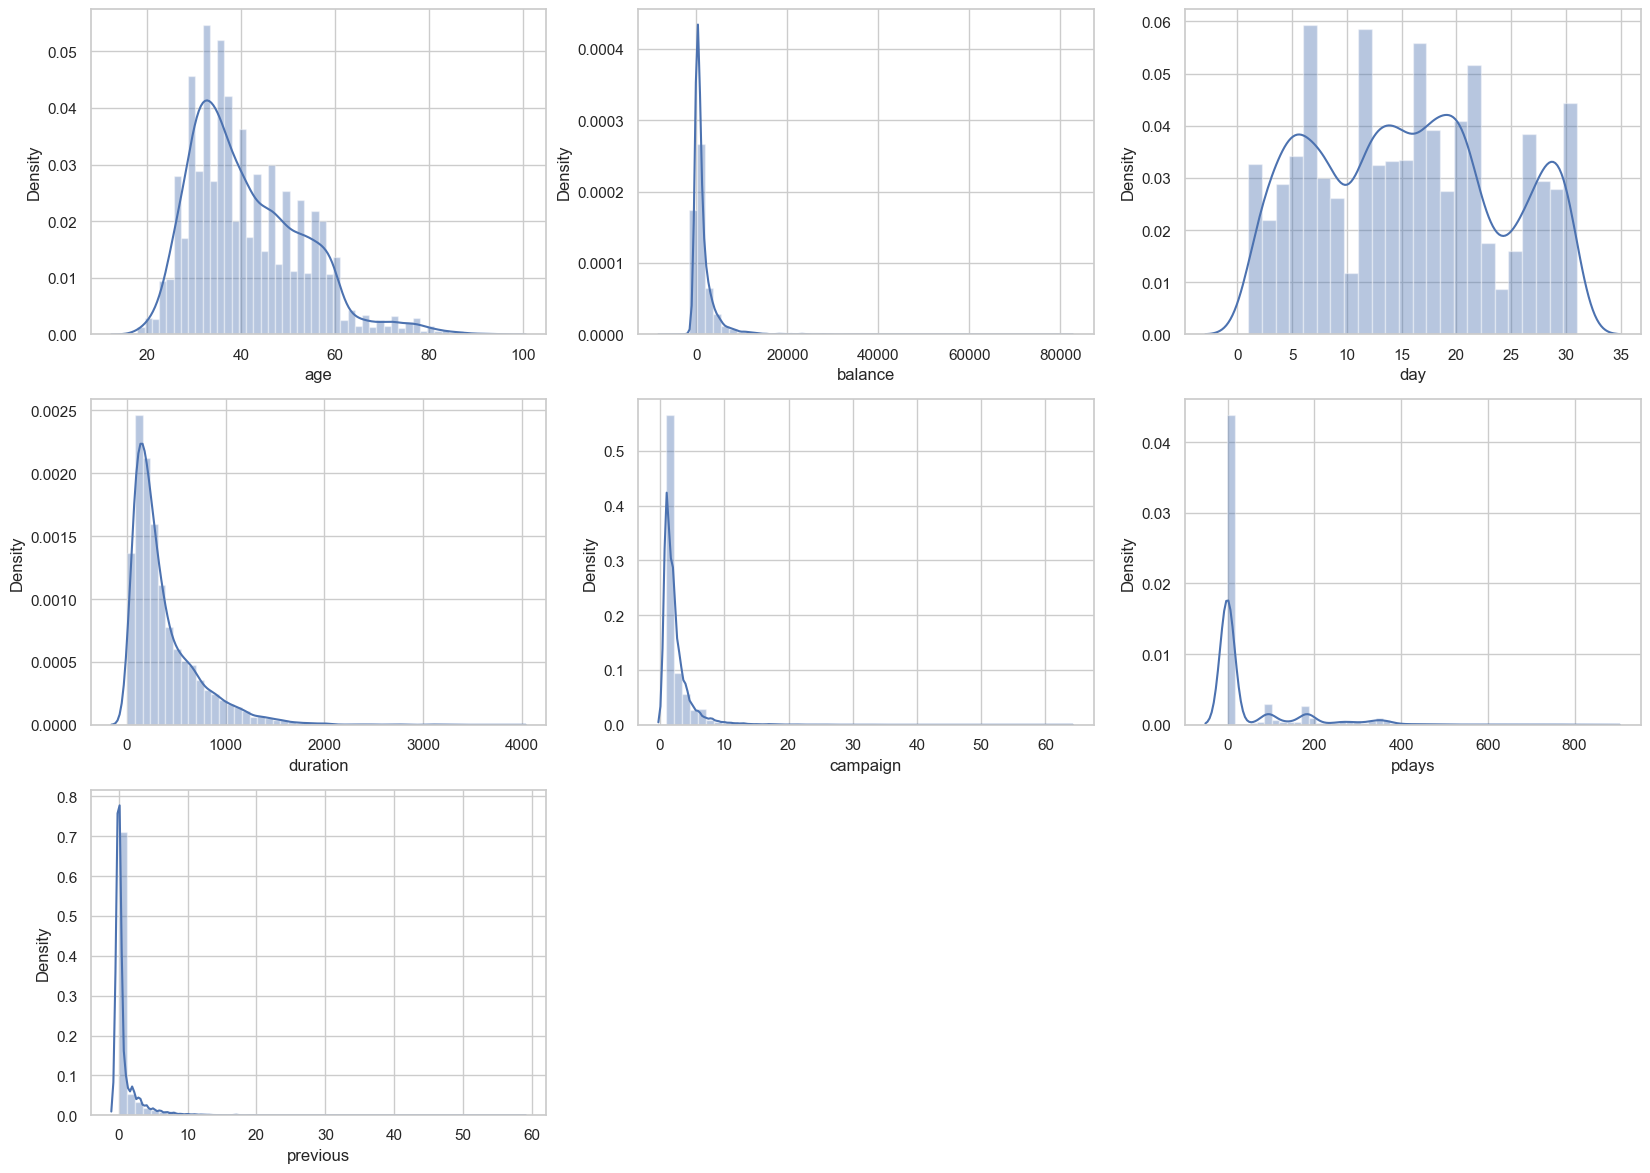

In [17]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

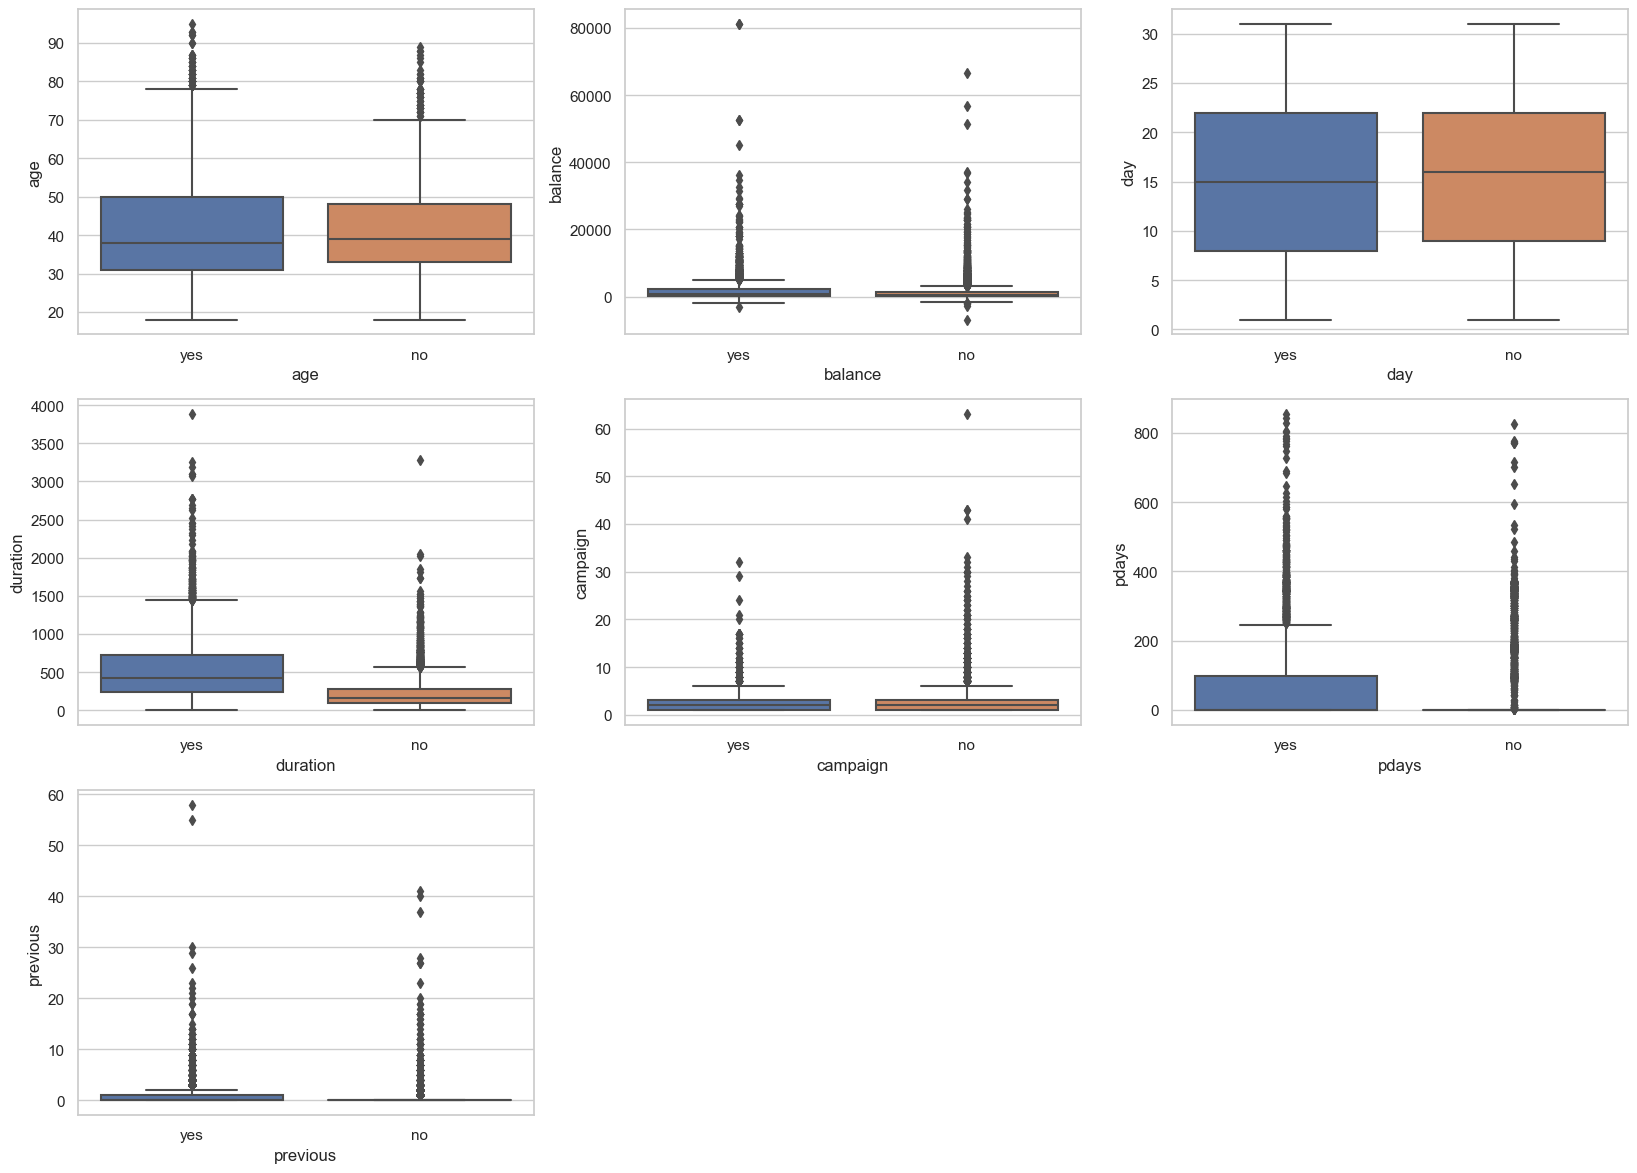

In [18]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Find Outliers  in numerical features

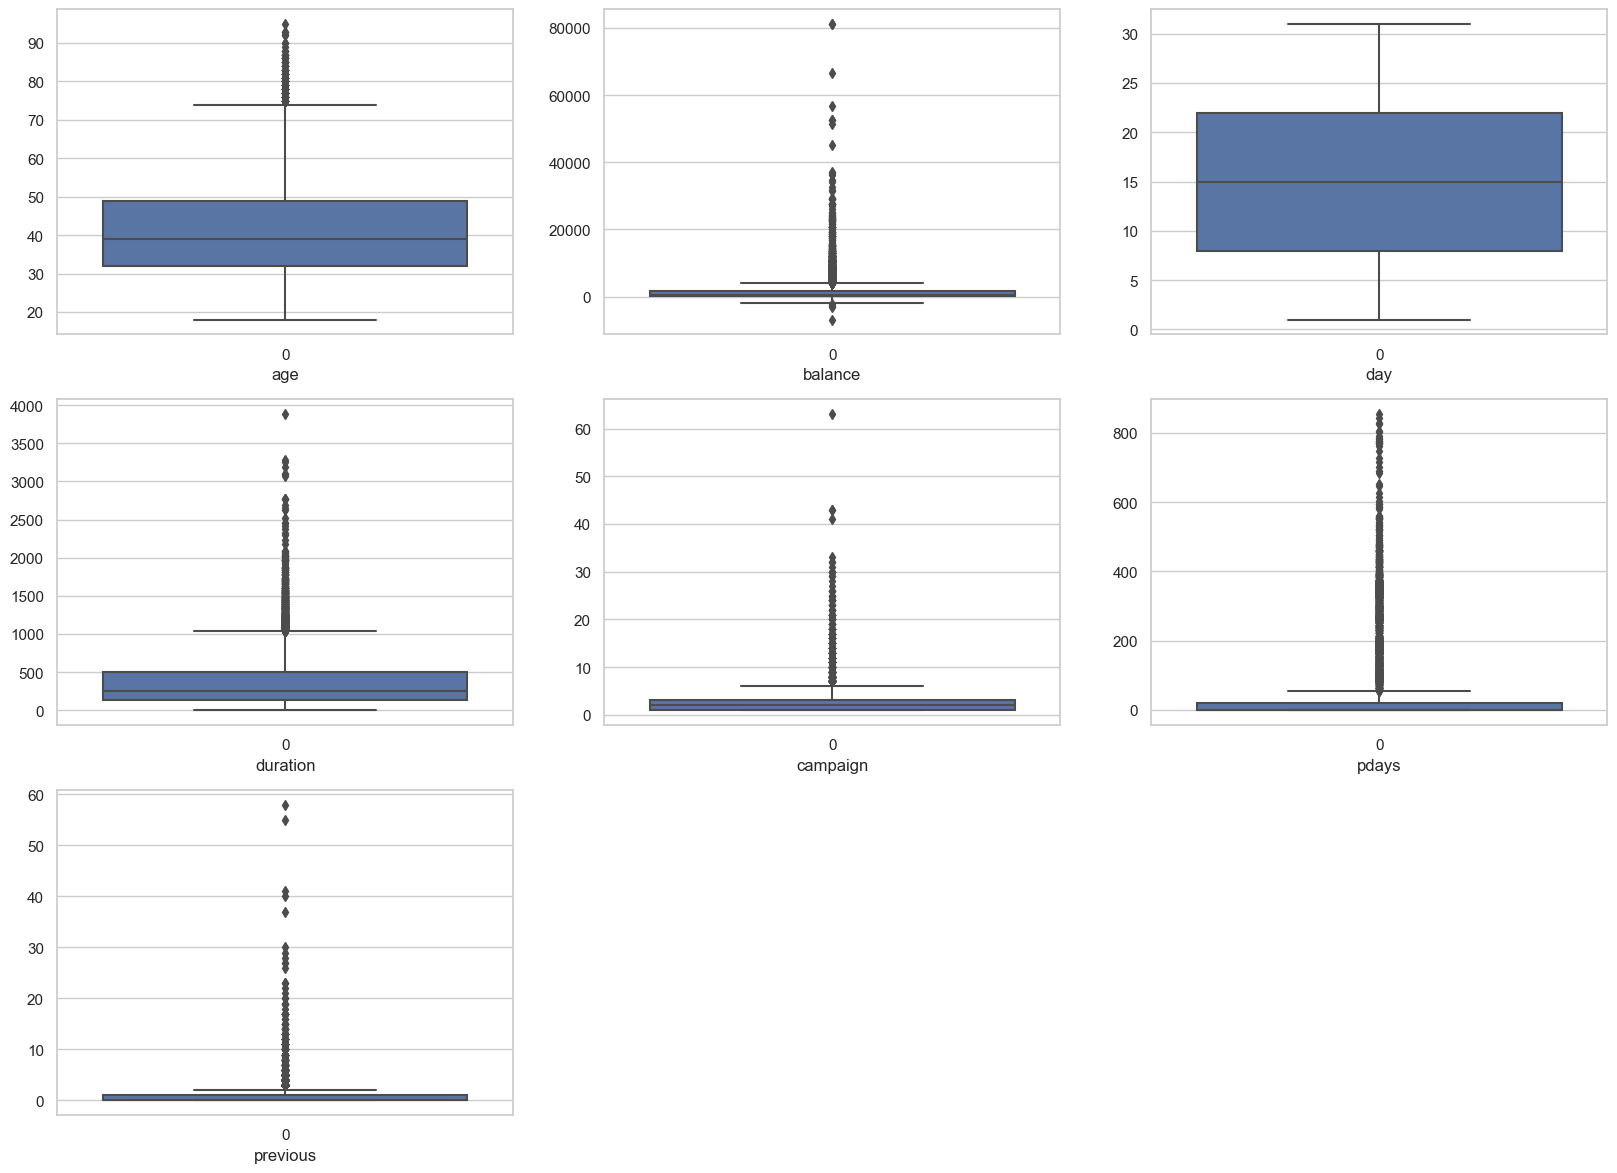

In [19]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Correlation 

<Axes: >

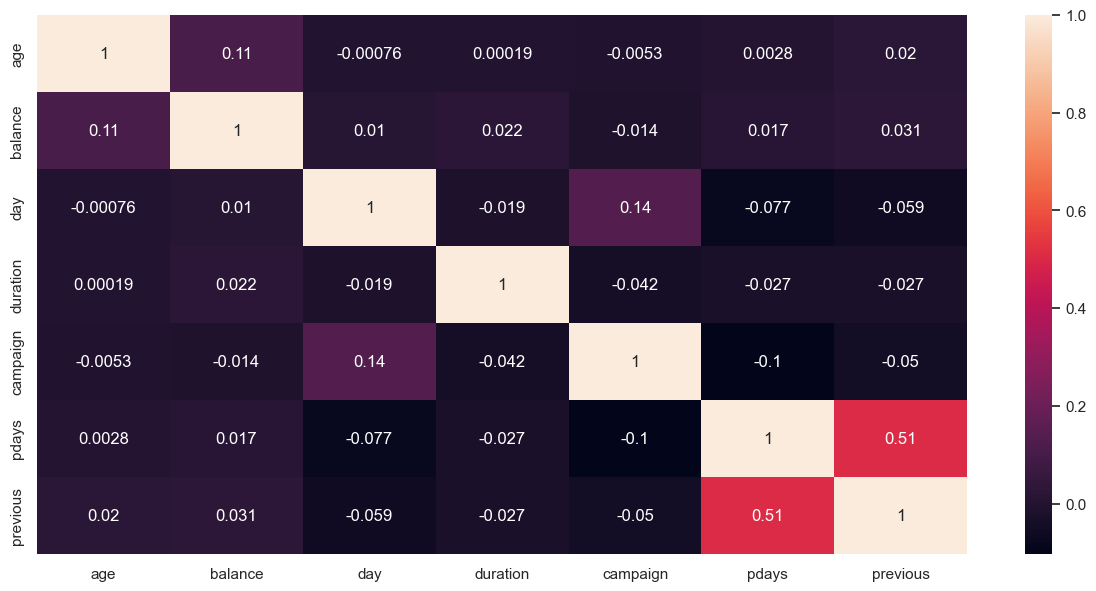

In [20]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

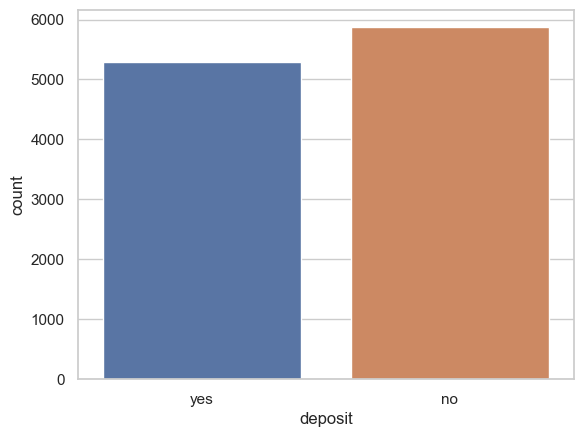

In [21]:
sns.countplot(x='deposit',data=df)
plt.show()

In [22]:
df['deposit'].groupby(df['deposit']).count()


deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [23]:
df['marital'].value_counts().to_frame()

,marital
married,6351
single,3518
divorced,1293


# Feature Engineering
Drop unwanted Features Handle Missing Values Handle Categorical Features Handle Feature Scalling Remove Outliers As per Exploratory Data Analysis EDA,

no missing value found no feature found with one value 9 categorical features defaut features does not play imp role it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [24]:
dfsample=df.copy()

In [25]:
dfsample.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [26]:
#default features does not play imp role
dfsample.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
# Create a label encoder object
#le = LabelEncoder()
#dfsample = dfsample.drop(['default','pdays','previous'], axis=1)


In [28]:
df= pd.read_csv('C:/Users/Dell/Downloads/nbank_telesale/Nbank_Tele.csv')

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [30]:
# Splitting features and target variable
X = df.drop(columns=['deposit'])
y = df['deposit']

In [31]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=[object]).columns

numerical_features = X.select_dtypes(include=[np.float64,np.int64]).columns

In [33]:
print(categorical_features)
print(numerical_features)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features),  # Categorical columns
        ('num', 'passthrough', numerical_features)     # Numerical columns
    ])

preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                ('num', 'passthrough',
                                 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])

In [35]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [36]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [37]:
 #print (pipeline.accuracy)
my_pred_array=X_test.iloc[14:15:]

In [38]:
 # Predict on the testing data
y_pred = pipeline.predict(my_pred_array)
y_pred

array(['yes'], dtype=object)

In [39]:
y_pred = pipeline.predict(X_test)

In [40]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8378862516793552

Classification Report:
               precision    recall  f1-score   support

          no       0.87      0.81      0.84      1166
         yes       0.81      0.87      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233


Confusion Matrix:
 [[948 218]
 [144 923]]


In [41]:
#Confusion matrix

In [42]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pipeline.predict(X_test))
cm

array([[948, 218],
       [144, 923]], dtype=int64)

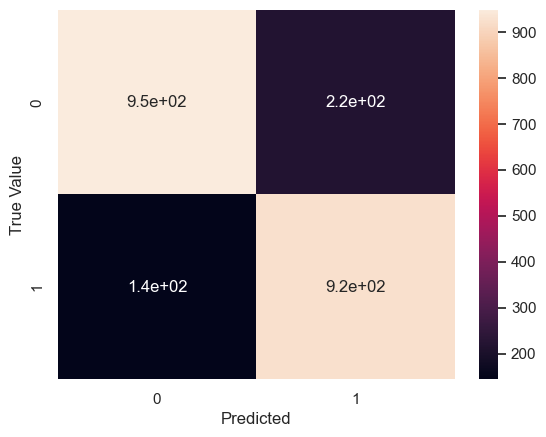

In [43]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()
            

In [44]:
import pickle
filename= 'pipeline.pkl'
pickle.dump(pipeline, open(filename,'wb'))

In [45]:
import pickle
model= 'RandomForestClassifier.pkl'
pickle.dump(RandomForestClassifier,open(model,'wb'))

In [46]:
pipeline_load=pickle.load(open(filename,'rb'))

In [47]:
X.iloc[14:15:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14,31,technician,single,tertiary,no,703,yes,no,unknown,8,may,943,2,-1,0,unknown


In [48]:
p=pipeline.predict(X.iloc[14:15:])
p

array(['yes'], dtype=object)

In [49]:
# categorical_features=['job','marital','education','default','housing','loan','contact','month','poutcome']
# numerical_features['age','balance','day','duration','campaign','pdays','previous']

In [50]:
def summarize_cat(data,categorical_features ):
  results=[]

  for column in data[categorical_features]:
      # Get the unique members of the column
      members = data[column].unique().tolist()
      # Append the column name and its unique members to the results list
      results.append([column, members])
  
  return pd.DataFrame(results, columns=['Column Name', 'Members'])

In [51]:
p=pipeline.predict(X.iloc[14:15:])
if p[0]==1:
    print("subscribed")
else:
    print("Not Subscribed")

Not Subscribed


In [52]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Call the summarize_cat function
summary_df = summarize_cat(df, categorical_features)

# Display or print the summary DataFrame
print(summary_df)

  Column Name                                            Members
0         job  [admin., technician, services, management, ret...
1     marital                        [married, single, divorced]
2   education            [secondary, tertiary, primary, unknown]
3     default                                          [no, yes]
4     housing                                          [yes, no]
5        loan                                          [no, yes]
6     contact                     [unknown, cellular, telephone]
7       month  [may, jun, jul, aug, oct, nov, dec, jan, feb, ...
8    poutcome                 [unknown, other, failure, success]


In [53]:
import sklearn
sklearn.__version__


'1.2.1'